# Progetto Python


In [1]:
import pandas as pd

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\ivano\\Documents\\GitHub\\Progetto-Python'

In [5]:
#carichiamo i dati degli annunci
df_listings = pd.read_csv('/Users/ivano/Documents/listings.csv')

In [6]:
print(df_listings)

                       id                                      listing_url  \
0                 5678774             https://www.airbnb.com/rooms/5678774   
1                 5625937             https://www.airbnb.com/rooms/5625937   
2                 6139798             https://www.airbnb.com/rooms/6139798   
3                 7479570             https://www.airbnb.com/rooms/7479570   
4                 8438872             https://www.airbnb.com/rooms/8438872   
...                   ...                                              ...   
20365  637425034363201358  https://www.airbnb.com/rooms/637425034363201358   
20366            40817739            https://www.airbnb.com/rooms/40817739   
20367  592550481216316403  https://www.airbnb.com/rooms/592550481216316403   
20368            10150665            https://www.airbnb.com/rooms/10150665   
20369            22007360            https://www.airbnb.com/rooms/22007360   

            scrape_id last_scraped           source  \
0      2

In [7]:
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [8]:
#carichiamo i dati delle recensioni
df_reviews = pd.read_csv('/Users/ivano/Documents/reviews.csv')

In [9]:
print(df_reviews)

                listing_id                  id        date  reviewer_id  \
0                     6400               36772  2010-04-19        94463   
1                     6400              227727  2011-04-16       415910   
2                     6400             1162608  2012-04-22       415910   
3                     6400            11670681  2014-04-11      8464658   
4                     6400            11780336  2014-04-14      5427294   
...                    ...                 ...         ...          ...   
611799  838184897759433339  847722747234842814  2023-03-15     46351960   
611800  838188511130316229  846976029055875390  2023-03-14    205576010   
611801  838266422550245358  840401357243960792  2023-03-05    424155005   
611802  838266422550245358  843313780914723751  2023-03-09    388259970   
611803  838266422550245358  844755620276373651  2023-03-11    186023564   

       reviewer_name                                           comments  
0               Hyun  I h

In [10]:
print(df_reviews.dtypes)

listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


In [44]:
# Calcola il numero di recensioni per ogni annuncio, può essere una buona proxy per il successo di un annuncio
df_nreviews = df_reviews.groupby('listing_id').size().reset_index(name='n_reviews')

In [45]:
print(df_nreviews)

               listing_id  n_reviews
0                    6400         12
1                   23986         22
2                   37256         34
3                   40470         41
4                   46536         30
...                   ...        ...
16040  845491730885978098          1
16041  845609167593520388          1
16042  845639972003959156          1
16043  846130517363365733          1
16044  846361153910571260          1

[16045 rows x 2 columns]


In [46]:
df_nreviews2 = df_nreviews.rename(columns={'listing_id': 'id'})

In [47]:
print(df_nreviews2)

                       id  n_reviews
0                    6400         12
1                   23986         22
2                   37256         34
3                   40470         41
4                   46536         30
...                   ...        ...
16040  845491730885978098          1
16041  845609167593520388          1
16042  845639972003959156          1
16043  846130517363365733          1
16044  846361153910571260          1

[16045 rows x 2 columns]


In [48]:
# Combina i dati degli annunci con il numero di prenotazioni
df_listings = pd.merge(df_listings, df_nreviews2, on='id', how='left')

In [49]:
def convert_to_int(value):
    try:
        result = int(value)
    except (ValueError, TypeError):
        result = 0
    return result

In [50]:
df_listings['n_reviews'] = df_listings['n_reviews'].apply(convert_to_int)

In [ ]:
df_listings['n_reviews'].dtypes

In [ ]:
print(df_listings['n_reviews'])

In [ ]:
df_listings['price'].dtypes

In [51]:
df_listings['price'] = df_listings['price'].replace({'\$': ''}, regex=True).astype(str)

In [52]:
df_listings['price'] = df_listings['price'].str.replace(',', '').astype(float)

In [ ]:
df_listings['price'].dtypes

In [ ]:
df_listings['description'] = df_listings['description'].astype(str)

In [ ]:
df_listings['len_description'] = df_listings['description'].apply(lambda x : len(str(x)))

In [53]:
df_listings[['host_location', 'id', 'latitude', 'longitude']]

,host_location,id,latitude,longitude
0,"Milan, Italy",5678774,45.452340,9.174740
1,"Milan, Italy",5625937,45.460010,9.185820
2,NaN,6139798,45.512520,9.130460
3,"Rome, Italy",7479570,45.456200,9.201310
4,"Milan, Italy",8438872,45.495470,9.207160
...,...,...,...,...
20365,"Milan, Italy",637425034363201358,45.457314,9.180191
20366,"Milan, Italy",40817739,45.458340,9.179450
20367,"Milan, Italy",592550481216316403,45.492150,9.193410
20368,NaN,10150665,45.460520,9.180800


In [55]:
#eliminiamo le colonne di cui non ci serviremo
df_listings = df_listings.drop(['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url','host_name','host_thumbnail_url', 'host_picture_url', 'host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated' ], axis=1)

KeyError: "['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url', 'host_url', 'host_name', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated'] not found in axis"

In [56]:
df_listings

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_reviews
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,10850820,2013-12-27,"Milan, Italy",NaN,NaN,NaN,...,4.50,4.00,NaN,f,1,1,0,0,0.04,3
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,138138,2010-06-04,"Milan, Italy",Massimo\n,within an hour,100%,...,4.87,4.39,NaN,t,18,18,0,0,2.33,226
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",31850692,2015-04-24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,t,1,1,0,0,NaN,0
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,7791230,2013-07-29,"Rome, Italy",Appassionata user di Airb&b dal 2008,NaN,NaN,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,23961606,2014-11-20,"Milan, Italy",NaN,NaN,NaN,...,NaN,NaN,NaN,f,1,0,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,637425034363201358,"Appartamento centro storico, navigli, ticinese.","In pieno centro storico, nel caratteristico e ...","Una tra le più caratteristiche zone di Milano,...",461479164,2022-05-29,"Milan, Italy",NaN,within an hour,100%,...,4.91,4.91,015146-CNI-05119,f,1,1,0,0,2.92,11
20366,40817739,Nuvola Suite - 900mt from Duomo Square,Fornasetti Suite is a lovely studio apartment ...,NaN,5053160,2013-02-11,"Milan, Italy","Hi! I'm Laura, I'm Milanese and I love this ci...",within an hour,100%,...,4.91,4.69,015146-CIM-02972,t,35,35,0,0,0.90,35
20367,592550481216316403,Abbadesse - Abbadesse,Spacious two bedroom two bathroom apartment of...,NaN,63191555,2016-03-16,"Milan, Italy",Beautiful urban apartments around Italy.\nWe a...,within an hour,100%,...,4.50,3.00,015146-CIM-00172,t,76,76,0,0,0.30,2
20368,10150665,"SWEET HOME SAN LORENZO, 2 BDR, 2 BTH, CITY CENTER",The house is located in the historical CENTER ...,MILAN SWEET HOME SAN LORENZO is located in the...,2718914,2012-06-23,NaN,"I love traveling , experiencing always new thi...",within an hour,100%,...,4.91,4.64,015146-CIM-00661,t,26,26,0,0,0.52,46


In [65]:
import matplotlib.pyplot as plt

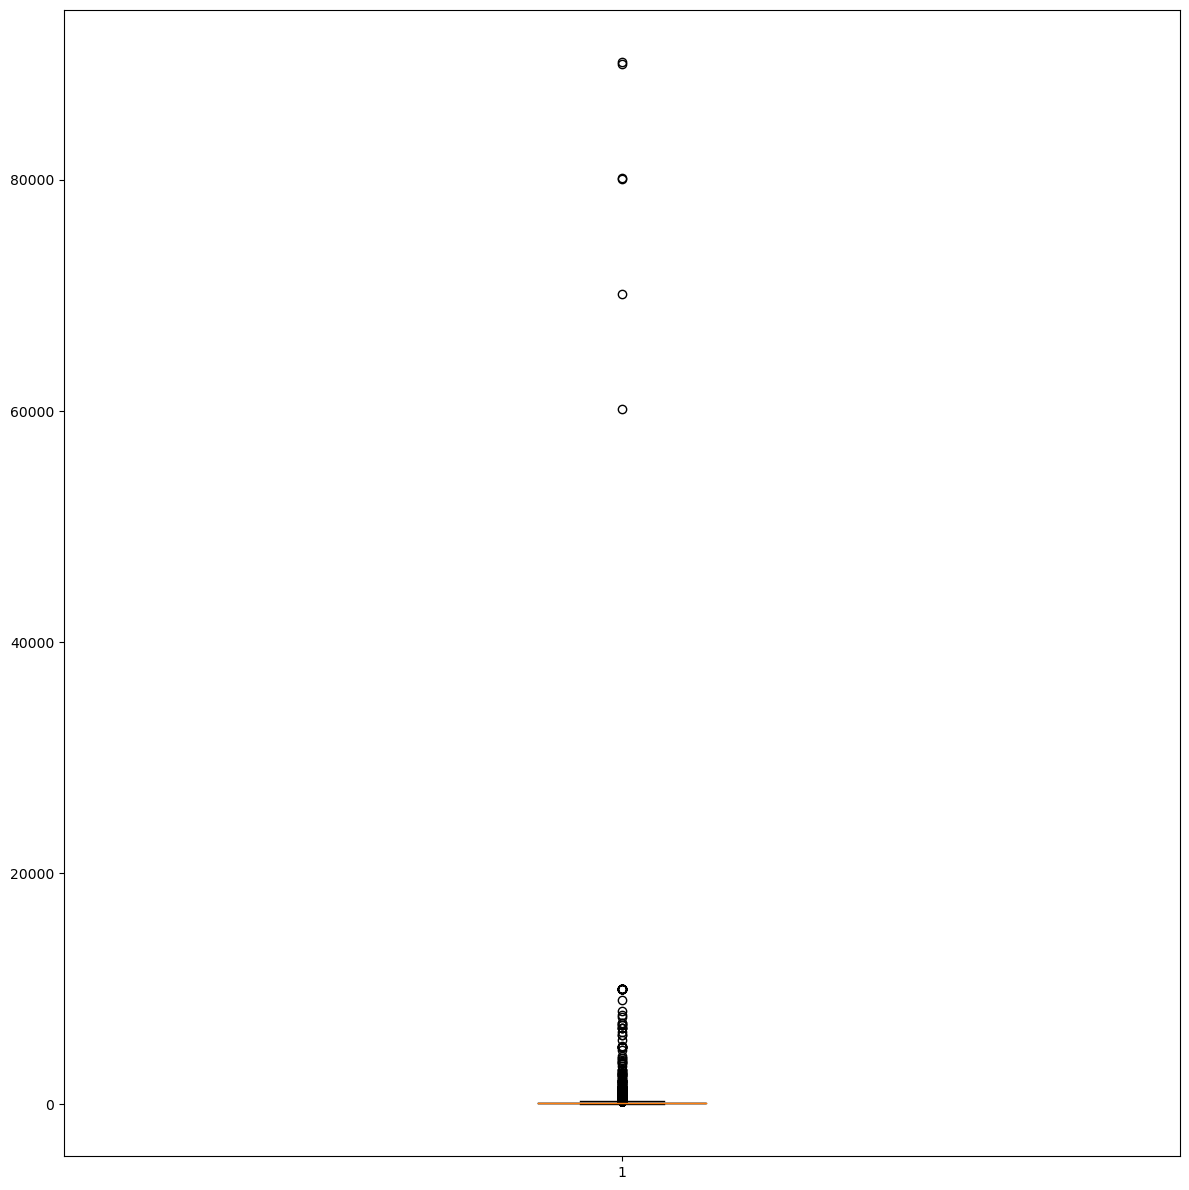

In [66]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

In [ ]:
from scipy import stats

In [ ]:
Q1 = df_listings['price'].quantile(0.25)
Q3 = df_listings['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df_listings = df_listings[(df_listings['price'] >= lower_bound) & (df_listings['price'] <= upper_bound)]


In [57]:
df_listings

,id,name,description,neighborhood_overview,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_reviews
0,5678774,Central Appartment,"A very nice flat in the city center, really go...",NaN,10850820,2013-12-27,"Milan, Italy",NaN,NaN,NaN,...,4.50,4.00,NaN,f,1,1,0,0,0.04,3
1,5625937,Fancy apt in historical building in Duomo Area...,T,NaN,138138,2010-06-04,"Milan, Italy",Massimo\n,within an hour,100%,...,4.87,4.39,NaN,t,18,18,0,0,2.33,226
2,6139798,Affitto casa per Expo,Affittasi casa periodo estivo. Vicinissima a E...,"Il quartiere dispone di tutti i servizi, compr...",31850692,2015-04-24,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,t,1,1,0,0,NaN,0
3,7479570,Central Air-Conditioned Apartment,Fully equipped house in the historical center ...,NaN,7791230,2013-07-29,"Rome, Italy",Appassionata user di Airb&b dal 2008,NaN,NaN,...,NaN,NaN,NaN,f,1,1,0,0,NaN,0
4,8438872,Bedroom for the weekend,Very close to the Central Train Station and me...,NaN,23961606,2014-11-20,"Milan, Italy",NaN,NaN,NaN,...,NaN,NaN,NaN,f,1,0,1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20365,637425034363201358,"Appartamento centro storico, navigli, ticinese.","In pieno centro storico, nel caratteristico e ...","Una tra le più caratteristiche zone di Milano,...",461479164,2022-05-29,"Milan, Italy",NaN,within an hour,100%,...,4.91,4.91,015146-CNI-05119,f,1,1,0,0,2.92,11
20366,40817739,Nuvola Suite - 900mt from Duomo Square,Fornasetti Suite is a lovely studio apartment ...,NaN,5053160,2013-02-11,"Milan, Italy","Hi! I'm Laura, I'm Milanese and I love this ci...",within an hour,100%,...,4.91,4.69,015146-CIM-02972,t,35,35,0,0,0.90,35
20367,592550481216316403,Abbadesse - Abbadesse,Spacious two bedroom two bathroom apartment of...,NaN,63191555,2016-03-16,"Milan, Italy",Beautiful urban apartments around Italy.\nWe a...,within an hour,100%,...,4.50,3.00,015146-CIM-00172,t,76,76,0,0,0.30,2
20368,10150665,"SWEET HOME SAN LORENZO, 2 BDR, 2 BTH, CITY CENTER",The house is located in the historical CENTER ...,MILAN SWEET HOME SAN LORENZO is located in the...,2718914,2012-06-23,NaN,"I love traveling , experiencing always new thi...",within an hour,100%,...,4.91,4.64,015146-CIM-00661,t,26,26,0,0,0.52,46


In [64]:
fig,ax = plt.subplots(figsize=(12,12), ncols=1)
ax.boxplot(df_listings['price'])
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [58]:
df_success = df_listings[(df_listings['n_reviews'] >= 50)&(df_listings['availability_30'] <= 10)]

In [ ]:
print(df_success)

In [93]:
df_listings = pd.merge(df_listings, df_success['id'], on='id', how='outer', suffixes=('_listings', '_success'), indicator=True)
df_listings = df_listings[df_listings['_merge'] == 'left_only']
df_listings = df_listings.drop('_merge', axis=1)

In [ ]:
meanprice_success = df_success['price'].mean()
stdprice_success = df_success['price'].std()
meanprice_listings = df_listings['price'].mean()
stdprice_listings = df_listings['price'].std()

In [ ]:
t, p = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [ ]:
if p < 0.05:
    print("La differenza tra le medie dei prezzi è significativa")
else:
    print("La differenza tra le medie dei prezzi non è significativa")

In [ ]:
meanprice_success

In [ ]:
meanprice_listings

In [ ]:
stdprice_success

In [ ]:
stdprice_listings

In [ ]:
meanlendes_success = df_success['len_description'].mean()
stdlendes_success = df_success['len_description'].std()
meanlendes_listings = df_listings['len_description'].mean()
stdlendes_listings = df_listings['len_description'].std()

In [ ]:
tlen, plen = stats.ttest_ind_from_stats(mean1=meanprice_success, std1=stdprice_success, nobs1=len(df_success),
                                  mean2=meanprice_listings, std2=stdprice_listings, nobs2=len(df_listings))


In [ ]:
if plen < 0.05:
    print("La differenza tra le medie della lunghezza delle descrizioni è significativa")
else:
    print("La differenza tra le medie della lunghezza delle descrizioni non è significativa")

In [ ]:
meanlendes_success

In [ ]:
meanlendes_listings

In [ ]:
stdlendes_success

In [ ]:
stdlendes_listings

In [ ]:
import pandas as pd

In [ ]:
all_words = ' '.join(df_success['description'].astype(str).tolist())

In [ ]:
all_words

In [ ]:
def word_count(df, col_name):
    # Uniamo tutte le parole in una stringa unica
    all_words = ' '.join(df[col_name].astype(str).tolist())
   # Rimuove la punteggiatura e le cifre
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Converti il testo in una lista di parole
    words = text.split()

    # Conta le ricorrenze di ogni parola
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1

    return word_counts

In [ ]:
word_success_description = word_count(df_success, description)

GEOLOCALIZZAZIONE

In [16]:
pip install pandas-geojson

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 1.1/1.1 MB 8.7 MB/s eta 0:00:00
     ---------------------------------------- 5.1/5.1 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 9.0 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [18]:
from pandas_geojson import read_geojson
geo_json = read_geojson('/Users/ivano/Documents/neighbourhoods.geojson')

In [11]:
df_neigh = pd.read_csv('/Users/ivano/Documents/neighbourhoods.csv')

In [23]:
import geopandas as gps

In [27]:
milan_gps = gps.read_file('/Users/ivano/Documents/neighbourhoods.geojson')

In [29]:
milan_gps.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   neighbourhood        88 non-null     object  
 1   neighbourhood_group  0 non-null      float64 
 2   geometry             88 non-null     geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.2+ KB


<AxesSubplot:>

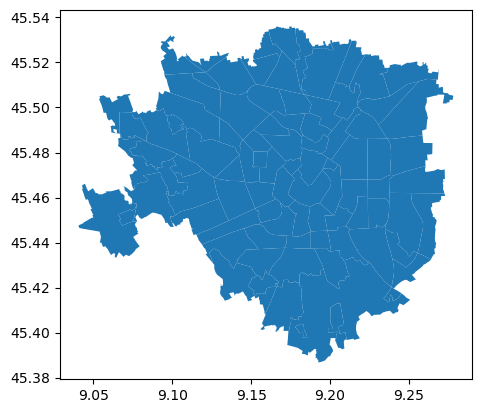

In [30]:
milan_gps.plot()

In [35]:
milan_gps['geometry']

0     MULTIPOLYGON (((9.12195 45.51602, 9.12163 45.5...
1     MULTIPOLYGON (((9.16887 45.52396, 9.16803 45.5...
2     MULTIPOLYGON (((9.12932 45.50998, 9.12973 45.5...
3     MULTIPOLYGON (((9.14368 45.48474, 9.14338 45.4...
4     MULTIPOLYGON (((9.23739 45.45588, 9.23731 45.4...
                            ...                        
83    MULTIPOLYGON (((9.09998 45.48789, 9.10146 45.4...
84    MULTIPOLYGON (((9.21002 45.44739, 9.21018 45.4...
85    MULTIPOLYGON (((9.15266 45.41520, 9.15200 45.4...
86    MULTIPOLYGON (((9.16506 45.46684, 9.16486 45.4...
87    MULTIPOLYGON (((9.19871 45.48484, 9.19836 45.4...
Name: geometry, Length: 88, dtype: geometry

In [36]:
milan_gps.centroid

C:\Users\ivano\AppData\Local\Temp\ipykernel_14452\639869370.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  milan_gps.centroid


0     POINT (9.12275 45.52025)
1     POINT (9.15998 45.52646)
2     POINT (9.12139 45.51225)
3     POINT (9.13630 45.48733)
4     POINT (9.23027 45.45342)
                ...           
83    POINT (9.08574 45.48470)
84    POINT (9.20514 45.45040)
85    POINT (9.14199 45.42333)
86    POINT (9.16286 45.47354)
87    POINT (9.19058 45.48359)
Length: 88, dtype: geometry

In [102]:
geo_success = df_success[['id', 'latitude', 'longitude']]

In [103]:
geo_success

,id,latitude,longitude
1,5625937,45.46001,9.18582
14,206450,45.45238,9.20745
22,26374075,45.49226,9.22463
24,4123599,45.46024,9.18091
86,2759420,45.48264,9.18543
...,...,...,...
20335,3816798,45.47167,9.23089
20344,17899097,45.46499,9.22995
20348,3725671,45.47641,9.18230
20351,45512683,45.48123,9.17672


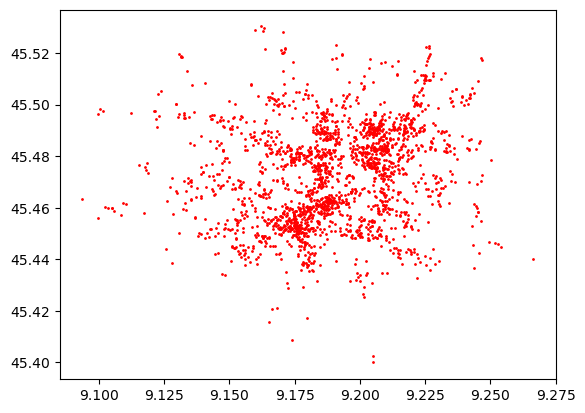

In [104]:
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [94]:
df_listings[['id', 'latitude', 'longitude']]

,id,latitude,longitude
0,5678774,45.452340,9.174740
2,6139798,45.512520,9.130460
3,7479570,45.456200,9.201310
4,8438872,45.495470,9.207160
5,10609449,45.448450,9.181160
...,...,...,...
20364,4845413,45.476990,9.182210
20365,637425034363201358,45.457314,9.180191
20366,40817739,45.458340,9.179450
20367,592550481216316403,45.492150,9.193410


In [95]:
geo_unsuccess = df_listings[['id', 'latitude', 'longitude']]

In [105]:
geo_success

,id,latitude,longitude
1,5625937,45.46001,9.18582
14,206450,45.45238,9.20745
22,26374075,45.49226,9.22463
24,4123599,45.46024,9.18091
86,2759420,45.48264,9.18543
...,...,...,...
20335,3816798,45.47167,9.23089
20344,17899097,45.46499,9.22995
20348,3725671,45.47641,9.18230
20351,45512683,45.48123,9.17672


In [96]:
geo_unsuccess

,id,latitude,longitude
0,5678774,45.452340,9.174740
2,6139798,45.512520,9.130460
3,7479570,45.456200,9.201310
4,8438872,45.495470,9.207160
5,10609449,45.448450,9.181160
...,...,...,...
20364,4845413,45.476990,9.182210
20365,637425034363201358,45.457314,9.180191
20366,40817739,45.458340,9.179450
20367,592550481216316403,45.492150,9.193410


In [98]:
geo_unsuccess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18205 entries, 0 to 20368
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         18205 non-null  int64  
 1   latitude   18205 non-null  float64
 2   longitude  18205 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 568.9 KB


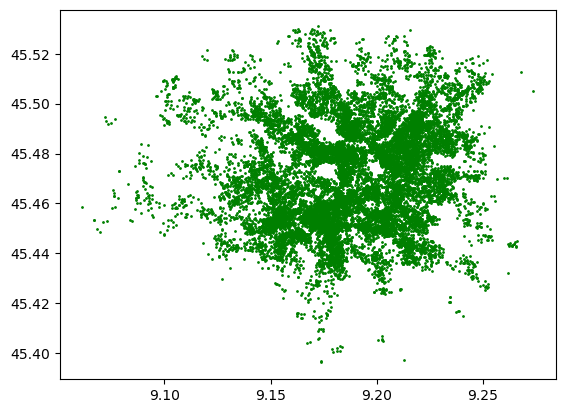

In [108]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')

<AxesSubplot:>

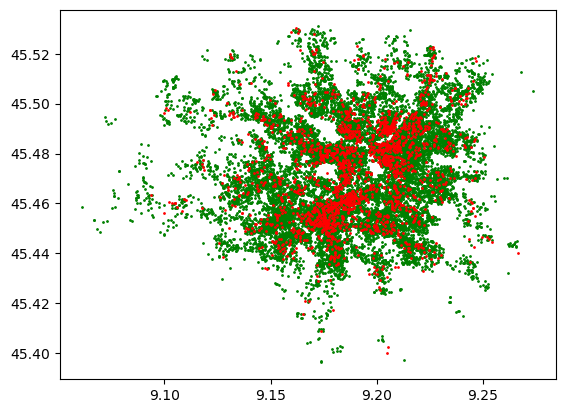

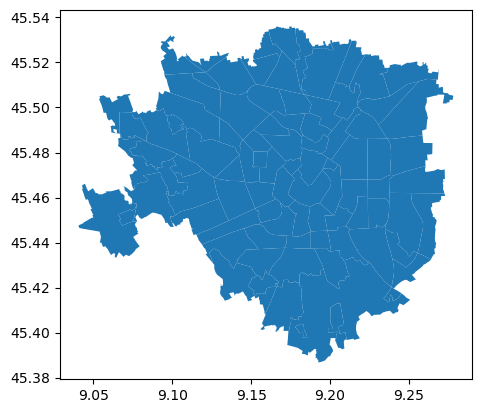

In [112]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
milan_gps.plot()

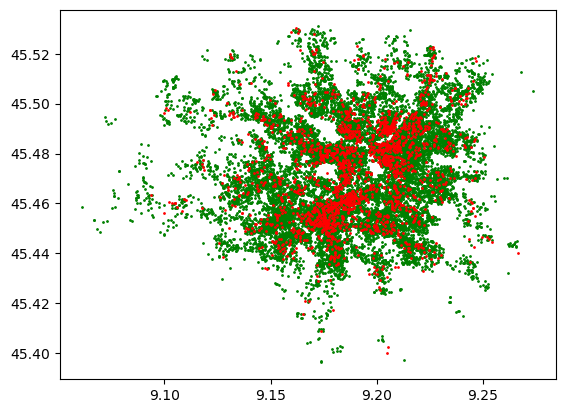

In [189]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')

In [163]:
df_metro = pd.read_json(r'C:/Users/ivano/documenti/metromilano.json')

In [180]:
df_metro.head()

,ID,FERMATA,N_ARCHI,latitude,longitude
0,2,GESSATE,1,45.546128,9.437564
1,4,ZARA,2,45.492662,9.192703
2,5,S.DONATO,1,45.430214,9.256324
3,6,MACIACHINI,2,45.497771,9.184904
4,8,MOLINO DORINO,2,45.505079,9.093327


In [177]:
df_metro.rename(columns={'DO_Y':'latitude', 'DO_X':'longitude'}, inplace=True)

None


In [186]:
geo_metro = df_metro.drop(['ID', 'N_ARCHI'], axis=1)

In [187]:
geo_metro

,FERMATA,latitude,longitude
0,GESSATE,45.546128,9.437564
1,ZARA,45.492662,9.192703
2,S.DONATO,45.430214,9.256324
3,MACIACHINI,45.497771,9.184904
4,MOLINO DORINO,45.505079,9.093327
...,...,...,...
88,COMASINA,45.531556,9.161898
89,AFFORI NORD,45.522379,9.167983
90,AFFORI CENTRO,45.512880,9.174410
91,DERGANO,45.505225,9.179710


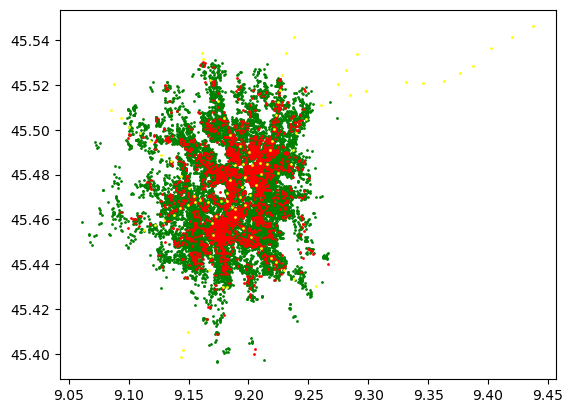

In [190]:
plt.scatter(geo_unsuccess['longitude'],geo_unsuccess['latitude'], s = 1, c = 'green')
plt.scatter(geo_success['longitude'],geo_success['latitude'], s = 1, c = 'red')
plt.scatter(geo_metro['longitude'],geo_metro['latitude'], s = 1, c = 'yellow')